<a href="https://colab.research.google.com/github/ML-Challenge/week3-supervised-learning/blob/master/L4.Tree-Based%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>

Decision trees are supervised learning models used for problems involving classification and regression. Tree models present a high flexibility that comes at a price: on one hand, trees are able to capture complex non-linear relationships; on the other hand, they are prone to memorizing the noise present in a dataset. By aggregating the predictions of trees that are trained differently, ensemble methods take advantage of the flexibility of trees while reducing their tendency to memorize noise. Ensemble methods are used across a variety of fields and have a proven track record of winning many machine learning competitions. In this lesson, we'll learn how to use Python to train decision trees and tree-based models with the user-friendly scikit-learn machine learning library. We'll see the advantages and shortcomings of trees and demonstrate how ensembling can alleviate these shortcomings, all while practicing on real-world datasets.

# Setup

In [1]:
# Download utils.py to working directory
#import urllib.request
#urllib.request.urlretrieve('https://raw.githubusercontent.com/ML-Challenge/week3-supervised-learning/master/utils.py', 'utils.py')

In [2]:
# Import utils
# We'll be using this module throughout the lesson
import utils

In [3]:
# Import dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

# Classification and Regression Trees

Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, we'll introduce the CART algorithm.

## Decision tree for classification

### Classification-tree

Given a labeled dataset, a classification tree learns a sequence of if-else questions about individual features in order to infer the labels. In contrast to linear models, trees are able to capture non-linear relantionships between features and labels. In addition, trees don't require the features to be on the same scale through standardization for example.

### Breast Cancer Dataset in 2D

To understand trees more concretely, we'll try to predict whether a tumor is malignant or benign in the Wisconsing Breast Cancer dataset using only 2 features.

![Breast Cancer](assets/breast_cancer.png)

The figure here shows a scatterplot of two cancerous cell features with malignant-tumors in blue and benign-tumors in red.

### Decision-tree Diagram

When a classification tree is trained on this dataset, the tree learns a sequence of if-else questions with each question involving one feature and one split-point. Take a look at the tree diagram:

![Tree Diagram](assets/tree_diagram.png)

At the top, the tree asks wheter the concave-points mean of an instance is smaller than 0.051. It it is, the instance traverses the `True` branch; otherwise, it traverses the `False` branch. Similarly, the instance keeps traversing the internal branches until it reaches an end. The label of the instance is then predicted to be that of the prevailing class at that end.

The maximum number of branches separating the top from an extreme-end is known as the `maximum depth` which is equal to 2 here.

### Decision Regions

A classification-model divides the feature-space into regions where all instances in one region are assigned to only one class-label. These regions are known as decision-regions. Decision-regions are separated by surfaces called decision-boundaries.

![Linear classifier decision region](assets/linear_decision.png)

The figure above shows the decision-regions of a linear-classifier. Not how the boundary is a straight-line.

### Decision Regions: CART vs. Linear Model

In contrast, as shown here on the right, a classification-tree produces rectangular decision-regions in the feature space.

![CART vs Linear Model](assets/cart_vs_linear.png)

This happens because at each split made by the tree, only one feature is involved.

### Train a classification tree

In this example we'll work with the [Wisconsin Breast Cancer Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) from the UCI machine learning repository. We'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (`radius_mean`) and its mean number of concave points (`concave points_mean`).

In [4]:
utils.wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
X = utils.wbc[['radius_mean', 'concave points_mean']]
y = utils.wbc['diagnosis'].astype('category').cat.codes

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = utils.SEED)

The dataset is already loaded and is split into 80% train and 20% test. The feature matrices are assigned to `X_train` and `X_test`, while the arrays of labels are assigned to `y_train` and `y_test` where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called `SEED` which is set to 42.

In [7]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

In [8]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=utils.SEED)

In [9]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [10]:
# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


### Evaluate the classification tree

Now that we've fit our first classification tree, it's time to evaluate its performance on the test set. We'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

In [11]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

In [12]:
# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {acc:.2f}")

Test set accuracy: 0.89


Not bad! Using only two features, our tree was able to achieve an accuracy of 89%!

### Logistic regression vs classification tree

In this example we will compare logistic regression and the classification tree on trained on the same dataset

In [13]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [14]:
# Instatiate logreg
logreg = LogisticRegression(solver='liblinear', random_state=utils.SEED)

In [15]:
# Fit logreg to the training set
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# Predict test set labels
logreg_pred = logreg.predict(X_test)
print(logreg_pred[0:5])

[0 0 0 1 0]


In [17]:
# Compute test set accuracy  
logreg_acc = accuracy_score(y_test, logreg_pred)
print(f"Test set accuracy: {logreg_acc:.2f}")

Test set accuracy: 0.91


## Classification tree Learning

In this section we'll examine how a classification-tree learns from data. Let's start by defining some terms.

### Building Blocks of a Decision-Tree

A `decision-tree` is a data-structure consisting of a hierarchy of individual units called nodes. A `node` is a point that involves either a question or a prediction. There are three kind of nodes:
- The `Root` is the node at which the decision-tree starts growing. It has no parent node and involves a question that gives rise to 2 children nodes through two branches.
- The `Internal node` is a node that has a parent. It also involves a question that gives rise to 2 children nodes.
- The `Leaf` is a node that has one parent node and involves no questions. It's where a prediction is made.

Recall that when a classifictaion tree is trainded on a labeled dataset, the tree learns patterns from the features in such a way to produce the purest leafs. In other words the tree is trained in such a way so that, in each leaf, one class-label is predominant.

![Tree Diagram with Notes](assets/tree_diagram_notes.png)

In the tree diagram shown above, consider the case where an instrance traverses the tree to reach the leaf on the left. In this leaf, there are 257 instances classified as benign and 7 instances classified as malignant. As a result, the tree's prediction for this instance whould be: `'benign'`.

In order to understand how a classification tree produces the purest leafs possible, let's first define the concept of information gain.

### Information Gain (IG)

The nodes of a classification tree are grown recursively; in other words, the obtention of an internal node or a leaf depends on the state of its predecessors. To produce the purest leafs possible, at each node, a tree asks a question involving one feature `f` and a split-point `sp`. But how dows it know which feature and which split-point to pick? It does so by maximizing information gain!

The tree considers that every node contains information and aims at maximizing the Information Gain obtained after each split. Consider the case where a node with N samples is split into a left-node with $N_{left}$ samples and a right-node with $N_{right}$ samples. The information gain for such split is given by the formular shown below:

$$ IG(\underbrace{f}_\text{feature} , \underbrace{sp}_\text{split-point}) = I(parent) - [\frac{N_{left}}{N} I(left) + \frac{N_{right}}{N}I(right)] $$

A question that you may have in mind here is: "What criterion is used to measure the impurity of a node?". Well there are different criteria we can use among which are the `gini-index` and `entropy`.

Not what we know what is `Information gain`, let's describe how a classification tree learns.

### Classification-Tree Learning

When an unconstrained tree is trained, the nodes are grown recursively. In other words, a node exists based on the state of its predecessors. At a non-lead node, the data is split based on feature `f` and split-point `sp` in such a way to maximize information gain. If the information gain obtained by splitting a node is null, the node is declared a leaf. 

Keep in mind that these rules are for unconstrained trees. If you constrain the `maximum depth` of a tree to 2 for example, all nodes having a depth of 2 will be declared leafs even if the information gain obtained by splitting such nodes is not null.

### Using entropy as a criterion

In this example, we'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. We'll do so using all the 30 features in the dataset, which we split into 80% train and 20% test.

In [18]:
X = utils.wbc.drop('diagnosis', axis=1)
y = utils.wbc['diagnosis'].astype('category').cat.codes

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = utils.SEED)

In [20]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=utils.SEED)

In [21]:
# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

### Entropy vs Gini index

In this example we'll compare the test set accuracy of `dt_entropy` to the accuracy of another tree named `dt_gini`. The tree `dt_gini` was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword `'gini'`.

In [22]:
# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=utils.SEED)

# Fit dt_gini to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [23]:
# Use dt_gini to predict test set labels
y_pred_gini= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred_gini)

In [24]:
# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using the gini index:  0.9298245614035088


In [25]:
# Use dt_entropy to predict test set labels
y_pred_entropy= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

In [26]:
# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

Accuracy achieved by using entropy:  0.9385964912280702


## Decision tree for regression

In this sectio, we'll learn how to train a decision tree for a regression problem. Recall that in regression, the target variable is continous. In other words, the output of the model is a real value.

### Auto-mpg Dataset

Let's motivate our discussion of regression by introducing the automobile miles-per-galon dataset from the UCI Machine Learning Repository. This dataset consists of 6 features corresponding to the characteristics of a car and a continous target variable labeled `mpg` which stands for miles-per-galon. Our task is to predict the `mpg` consumption of a car given these six features.

To simplify the problem, here the analysis is restricted to only one feature corresponding to the displacement of a car. This feature is denoted by `displ`.

A 2D scatter plot of `mpg` versus `displ` shows that the mpg-consumption decreases nonlinearly with displacement. Note that linear models such as `linear regression` would not be able to capture such a non-linear trend.

![Non-linear trend](assets/non_linear_trend.png)

### Information Criterion for Regression-Tree

It is important to note that, when a regression tree is trained on a dataset, the impurity of a node is measured using the mean-squared error of the targets in that node

$$ I(node) = \underbrace{MSE(node)}_\text{mean-squared-error} = \frac{1}{N_{node}} \sum_{i\in node} (y^{(i)} - \hat{y}_{node})^2 $$

$$ \underbrace{\hat{y}_{node}}_\text{mean-target-value} = \frac{1}{N_{node}} \sum_{i\in node} y^{(i)}  $$

This means that the regression tree tries to find the splits that produce leafs where in each leaf the target values are on average, the closest possible to the mean-value of the labels in that particular leaf.

### Prediction

As a new instance traverses the tree and reaches a certain leaf, its target-variable `'y'` is computed as the average of the target-variables contained in that leaf as shown in the formula below:

$$ \hat{y}_{pred}(leaf) = \frac{1}{N_{leaf}} \sum_{i \in leaf} y^{(i)} $$

To highlight the importance of the flexibility of regression trees, take a look at this figure:

![Tree vs Linear Regression](assets/tree_vs_linear.png)

On the left we have a scatter plot of the data in blue along with the predictions of a linear regression model shown in black. The linear model fails to capture the non-linear trend exhibited by the data. On the right, we have the same scatter plot along with a red line corresponding to the prediction of a regression tree. The regressiont tree shows a greater flexibility and is able to capture the non-linearity, though not fully.

In the next chapter, we'll aggregate the predictions of a set of trees that are trained differently to obtain better results.

### Train a regression tree

In this example, we'll train a regression tree to predict the `mpg` (miles per gallon) consumption of cars in the [auto-mpg dataset](https://www.kaggle.com/uciml/autompg-dataset) using all the six available features.

In [27]:
utils.auto.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [28]:
X = utils.auto.drop('mpg', axis=1)
y = utils.auto['mpg']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = utils.SEED)

In [30]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

In [31]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=utils.SEED)

In [32]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.13,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

### Evaluate the regression tree

In this example, we will evaluate the test set performance of `dt` using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

In [33]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

In [34]:
# Compute y_pred
y_pred = dt.predict(X_test)

In [35]:
# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

In [36]:
# Compute rmse_dt
rmse_dt = mse_dt ** 0.5

In [37]:
# Print rmse_dt
print(f"Test set RMSE of dt: {rmse_dt:.2f}")

Test set RMSE of dt: 4.27


### Linear regression vs regression tree

In this example, you'll compare the test set RMSE of `dt` to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as dt.

In [38]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [39]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred_lr = linreg.predict(X_test)

In [41]:
# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

In [42]:
# Compute rmse_lr
rmse_lr = mse_lr ** 0.5

In [43]:
# Print rmse_lr
print(f'Linear Regression test set RMSE: {rmse_lr:.2f}')

Linear Regression test set RMSE: 3.98


In [44]:
# Print rmse_dt
print(f'Regression Tree test set RMSE: {rmse_dt:.2f}')

Regression Tree test set RMSE: 4.27


# The Bias-Variance Tradeoff

The bias-variance tradeoff is one of the fundamental concepts in supervised machine learning. In this chapter, we'll diagnose the problems of overfitting and underfitting. We'll also introduce the concept of ensembling where the predictions of several models are aggregated to produce predictions that are more robust.

## Generalization Error

In supervised learning, we make the assumption that there's a mapping `f` between features and labels: `y = f(x)`. The function `f` shown in red below is an unknown function that we want to determine.

![f function](assets/f_function.png) 

In reality, data generation is always accompanied with randomness or noise like the blue points shown here.

Our goal is to find a model $ \hat{f} $ that best approximates $f: \hat{f} \approx f $. When training $ \hat{f} $, we want to make sure that noise is discarded as much as possible. At the end. $\hat{f}$ should achieve a low predictive error on unseen datasets.

We can encounter two difficulties when approximating $f$: 
* The first is `overfitting`, it's when $\hat{f}(x)$ fits the noise in the training set.
* The second is `underfitting`, it's when $\hat{f}$ is not flexible enough to approximate $f$.

**Overfitting**

When a model overfits the training set, its predictive power on unseen datasets is pretty low. This is illustrated by the predictions of the decision tree regressor shown below in red:

![Overfitting tree](assets/overfitting_tree.png)

The model clearly memorized the noise present in the training set. Such model achieves a low training set error and a high test set error.

**Underfitting**

When a model underfits the data, like regression tree whose predictions are shown below in red, the training set error is roughly equal to the test set error:

![Underfitting tree](assets/underfitting_tree.png)

However, both errors are relatively high. Now the trained model isn't flexible enough to capture the complex dependency between features and labels. In analogy, it's like teaching calculus to a 3-year old. The child does not ave the required mental abstraction level that enables him to understand calculus. 

The `generalization error` of a model tells us how much it generalizes on unseen data. It can be decomposed into 3 terms: bias, variance and irreducible error where the irreducible error is the error contribution of noise.
$$ \hat{f} = bias^2 + variance + irreducible\_error $$

The `Bias` term tells us, on average, how much $ \hat{f} \neq f $. To illustrate this consider the high bias model shown here in black:
![Tree Bias](assets/tree_bias.png)
this model is not flexible enough to approximate the true function $f$ shown in red. High bias models lead to underfitting.

The `Variance` term tells us how much $\hat{f}$ is inconsistent over different training sets. Conside the high variance model shown below in black:
![Tree Variance](assets/tree_variance.png)
in this case, $\hat{f}$ follows the training data points so closely that is misses the true function $f$ shwon in red. High variance models lead to overfitting.

The complexity of a model sets its flexiblity to approximate the true function $f$. For example: increasing the `maximum-tree-depth` increases the complexity of a decision tree. The diagram below shows how the best model complexity corresponds to the lowest generalization error:

![Tree trade off](assets/tree_off.png)

When the model complexity increases, the variance increases while the bias decreases. Conversely, when model complexity decreases, variance decreases and bias increases. Our goal is to find the model complexity that achieves the lowest generalization error. Since this error is the sum of three terms with the irreducible error being constant, we need to find a balance between bias and variance because as one increases the other decreases. This is known as the bias-variance trade-off.

Visually, we can imagine approximating $\hat{f}$ as aiming at the center of a shooting-target where the center is the true function $f$:

![Bias-Variance Tradeoff](assets/target_practice.png)

If $\hat{f}$ is low bias and low variance, our shots will be closely clustered around the center. If $\hat{f}$ is high variance and high bias, not only will our shots miss the target but they would also be spread all around the shooting target.

## Diagnose bias and variance problems

### Estimating the Generalization Error

Given that we've trained a supervised machine learning model labeled $\hat{f}$, how do we estimate the $\hat{f}$'s generalization error? This cannot be done directly because:

* $f$ is unknown
* usually we only have one dataset
* we don't have access to the error term due to noise.

A solution to this is to first split the data into a training and test set. The model $\hat{f}$ can be then fit to the training set and its error can be evaluated on the test set. The generalization error of $\hat{f}$ is roughly approxiamted by $\hat{f}$ error on the test set.

### Better Model Evaluation with Cross-Validation

Usually, the test set should be kept untouched until one is confident about $\hat{f}$'s performance. It should only be used to evaluate $\hat{f}$'s final performance or error. Now, evaluating $\hat{f}$'s performance on the training set may produce an optimistic estimation of the error because $\hat{f}$ was already exposed to the training set when it was fit.

To obtain a reliable estimate of $\hat{f}$'s performance, we use a technique called cross-validation or CV. CV can be performed using:

* K-Fold CV
* Hold-out CV

In this chapter we are going over the K-fold CV. The diagram below illustrates this technique for K=10:

![10 K-fold CV](assets/k_fold_10.png)

* First the training set (T) is split randomly into 10 partitions or folds
* The error of $\hat{f}$ is evaluated 10 times on the 10 folds
* Each time, one fold is picked for evaluation after training $\hat{f}$ on the other 9 folds
* At the end, we obtain a list of 10 errors

Finally, as shown in this formula, the CV-error is computed as the mean of the 10 obtained errors:
$$ CV_{error} = \frac{\sum_{i=1}^n E_i}{n} $$

Once we have computed $\hat{f}$'s cross-validation-error, we can check if it is greater than $\hat{f}$'s training set error.

**Diagnose Variance Problems**

If $\hat{f}$ suffers from `high variance`: CV error of $\hat{f}$ > training set error of $\hat{f}$. In such case $\hat{f}$ has overfit the training set. To remedy this we can try the following:

* decrease model complexity. For example, in a decision tree we can reduce the `maximum-tree-depth` or increase the `maximum-samples-per-leaf`.
* gather more data to train $\hat{f}$

**Diagnose Bias Problems**

On the other hand, $\hat{f}$ is said to suffer from high bias if: CV error of $\hat{f} \approx$ training set error of $\hat{f} >>$ desired error. In such case $\hat{f}$ underfits the training set. To remedy this we can try the following:

* increase model complexity. For example, in a decision tree increase max depth or decrease min samples per leaf
* gather more relevant features for the problem.

### Instantiate the model

In the following set of examples, we'll diagnose the bias and variance problems of a regression tree. The regression tree we'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.

In [45]:
X = utils.auto.drop('mpg', axis=1)
y = utils.auto['mpg']

In [46]:
# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = utils.SEED)

In [47]:
# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=utils.SEED)

### Evaluate the 10-fold CV error

In this example, we'll evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree `dt` that we instantiated above.

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1) 

In [50]:
# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**0.5

In [51]:
# Print RMSE_CV
print(f'CV RMSE: {RMSE_CV:.2f}')

CV RMSE: 5.14


A very good practice is to keep the test set untouched until we are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.

### Evaluate the training error

We'll now evaluate the training set RMSE achieved by the regression tree dt that you instantiated above.

In [52]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.26,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [53]:
# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

In [54]:
# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(0.5)

In [55]:
# Print RMSE_train
print(f'Train RMSE: {RMSE_train:.2f}')

Train RMSE: 5.15


## Ensemble Learning

In this lesson we will look at a supervised learning technique known as ensemble learning. Let's first recap what we learned from the previous chapter about CARTs.

**Advantages of CARTs**

CARTs present many advantages:

* For example they are easy to understand and their output is easy to interpret. 
* In addition, CARTs are easy to use and their flexibility gives them an ability to describe nonlinear dependencies between features and labels. 
* Moreover, we don't need a lot of feature preprocessing to train a CART. 
* In contrast to other models, we don't have to standardize or normalize features before feeding them to a CART.

**Limitations of CARTs**

CARTs also have limitations:

* A classification tree for example, is only able to produce orthogonal decision boundaries.
* CARTs are also very sensitive to small variations in the training set. Sometimes, when a single point is removed from the training set, a CARTs learned parameters may change drastically.
* CARTs also suffer from high variance when they are trained without constraints. In such case, they may overfit the training set.

A solution that takes advantage of the flexibility of CARTs while reducing their tendency to memorize noise is ensemble learning.

Ensemble learning can be summarized as follows:

* Train different models on the same dataset.
* Let each model make its predictions.
* A meta-model aggregates predictions of individual models and outputs a final prediction

The final prediction is more robust and less prone to errors than each individual model. The best results are obtained when the models are skillful but in different way meaning that if some models make predictions that are way off, the other models should compensate these errors. In such case, the meat-model's predictions are more robust.

Let's take a look at the diagram below to visually understand how ensemble learning works for a classification problem:

![Ensemble Learning](assets/ensemble.png)

* First the training set is fed to different classifiers
* Each classifier learns its parameters and makes predictions
* The predictions are fed to a meta model which aggregates them and outputs a final prediction

### Voting Classifier

Let's now take a look at an ensemble technique known as the voting classifier. More concretely, we'll consider a binary classification task. The ensemble here consists of N classifiers making the predictions $ P_0, P_1, ... , P_N $ with $P_i$ = 0 or 1. The meta-model outputs the final prediction by hard voting.

To understand hard voting, consider a voting classifier that consists of 3 trained classifiers as shown in the diagram below:

![Voting classifier](assets/voting_classifier.png)

While classifiers 1 and 3 predict the label of 1 for a new data-point, classifier 2 predicts the label 0. In this case, 1 has 2 votes while 0 has 1 vote. As a result, the voting classifier predicts 1.

### Define the ensemble

In the following set of examples, we'll work with the [Indian Liver Patient Dataset](https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset) from the UCI Machine learning repository.

In this example, we'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

In [56]:
utils.liver_patients.head()                           

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [57]:
# Import the classes used for the enesemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

In [58]:
# Instantiate lr
lr = LogisticRegression(solver='liblinear' ,random_state=utils.SEED)

In [59]:
# Instantiate knn
knn = KNN(n_neighbors=27)

In [60]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=utils.SEED)

In [61]:
# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

### Evaluate individual classifiers

In this example we'll evaluate the performance of the models in the list classifiers that we defined in the previous exercise. We'll do so by fitting each classifier on the training set and evaluating its test set accuracy.

In [62]:
X = utils.liver_patients.drop('Liver_disease', axis=1)
y = utils.liver_patients['Liver_disease']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=utils.SEED)

In [64]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
    
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
    
    # Evaluate clf's accuracy on the test set
    print(f'{clf_name:s} : {accuracy:.3f}')

Logistic Regression : 0.764
K Nearest Neighbours : 0.701
Classification Tree : 0.730


Notice how `LogisticRegression' got the highest accuracy of 76.4%

### Better performance with a Voting Classifier

Finally, we'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

In [65]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

In [66]:
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)  

In [67]:
# Fit vc to the training set
vc.fit(X_train, y_train) 

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('K Nearest Neighbours',
                              KNeighborsClassifier(algorithm='auto',
                                                   l...
                             ('Classification Tree',
                              DecisionTr

In [68]:
# Evaluate the test set predictions
y_pred = vc.predict(X_test)

In [69]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier: {accuracy:.3f}')

Voting Classifier: 0.770


Notice how the voting classifier achieves a test set accuracy of 77%. This value is greater than that achieved by LogisticRegression.

# Bagging and Random Forests

Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. In this chapter, we'll show how bagging can be used to create a tree ensemble. We'll also show how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.

## Bagging

In this chapter, we'll introduce an ensemble method known as Bootstrap aggregation or Bagging. In the last chapter we learned that the Voting Classifier is an ensemble of models that are fit to the same training set using different algorithms. We also say that the final predictions were obtained by majority voting. 

In `Bagging`, the ensemble is formed by models that use the same training algorithm. However, these models are not trained on the entire training set. Instead, each model is trained on a different subset of the data. In fact, Bagging stands for Bootstrap Aggregation.Its name refers to the fact that it uses a technique known as the `bootstrap`. Overall, Bagging has the effect of reducing the variance of individual models in the ensemble.

Let's first try to understand what the bootstrap method is. Consider the case where you have 3 balls labeled A, B, and C. A bootstrap sample is a sample drawn from this with replacement. By replacement, we mean that any ball can be drawn many times.
![Bootstrap](assets/bootstrap.png)
For example, in the first bootstrap sample shown above in the diagram, B was drawn 3 times in a raw. In the second bootstrap sample, A was drwan two times while B was drawn once, and so on. Now, how bootstrap can help us produce an ensemble?

**Bagging: Training**

In the training phase, bagging consists of drawing N different bootstrap samples from the training set. As shown in the diagram below, each of these bootstrap samples are the used to train N models that use the same algorithm:
![Bootstrap Training](assets/bootstrap_training.png)

**Bagging: Prediction**

When a new instance is fed to the different models, forming the bagging ensemble, each model output its prediction:
![Bagging Prediction](assets/bagging_prediction.png)
The meta-model collects these predictions and outputs a final prediction depending on the nature of the problem.

**Bagging: Classification & Regression**

* In *classification*, the final prediction is obtained by majority voting. The corresponding classifier in scikit-learn is `BaggingClassifier` 
* In *regression*, the final prediction is the average of the predictions made by the individual models forming the ensemble. The corresponding regressor in scikit-learn is `BaggingRegressor`.

### Define the bagging classifier

In the following examples we'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Our task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. We'll do so using a Bagging Classifier.

In [70]:
X = utils.liver_disease.drop('Liver_disease', axis=1)
y = utils.liver_disease['Liver_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = utils.SEED)

In [71]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [72]:
# Instantiate dt
dt = DecisionTreeClassifier(random_state=utils.SEED)

In [73]:
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=utils.SEED)

### Evaluate Bagging performance

Now that we instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

In [74]:
# Fit bc to the training set
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
       

In [75]:
# Predict test set labels
y_pred = bc.predict(X_test)

In [77]:
# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print(f'Test set accuracy of bc: {acc_test:.2f}') 

Test set accuracy of bc: 0.68


## Out of Bag Evaluation

Recall that in bagging, some instances may be sampled several times for one model. On the other hand, other instance may not be sampled at all.

**Out Of Bag (OOB) instances**

On average, for each model, 63% of the training instances are sampled. The remaining 37% that are not sampled constitute what is known as the Out-of-bag or OOB instances. Since OOB instances are not seen by a model during training, these can be used to estimate the performance of the ensemble without the need for cross-validation. This technique is known as OOB-evaluation.

To understand OOB-evaluation more concretely, take a look at this diagram:
![OOB Evaluation](assets/oob_evaluation.png)
Here, for each model, the bootstrap instances are shown in blue while the OOB-instances are shown in red. Each of the N models constituting the ensemble is then trained on its corresponding bootstrap samples and evaluated on the OOB instances. This leads to the obtainment of `N` OOB scores labeled $OOB_1$ to $OOB_N$. The OOB-score of the bagging ensemble is evaluated as the average of these N OOB scores as shown by the formula on the top.

### Prepare the ground

In the following example, we'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, we can evaluate the OOB accuracy of an ensemble classifier by setting the parameter `oob_score` to `True` during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the `.oob_score_` attribute from the corresponding instance.

In [78]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [79]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=utils.SEED)

In [80]:
# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, oob_score=True, random_state=utils.SEED)

### OOB Score vs Test Set Score

Now that we instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.

In [81]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=8,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
       

In [82]:
# Predict test set labels
y_pred = bc.predict(X_test)

In [83]:
# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

In [84]:
# Evaluate OOB accuracy
acc_oob = bc.oob_score_

In [85]:
# Print acc_test and acc_oob
print(f'Test set accuracy: {acc_test:.3f}, OOB accuracy: {acc_oob:.3f}')

Test set accuracy: 0.658, OOB accuracy: 0.715


## Random Forests (RF)

We'll learn now about another ensemble learning method knows as `Random Forests`. Recall that in bagging the base estimator could be any model, including a decision tree, logistics regression or even a neural network. Each estimator is trained on a distinct bootstrap sample drawn from the training set using all available features.

Random Forests is an ensemble method that uses a decision tree as a base estimator. In Random Forests, each estimator is trained on a different bootstrap sample having the same size as the training set. Random Forests introduces further randomization than bagging when training each of the base estimator. When each tree is trained, only $d$ features can be sampled at each node without replacement, where $d$ is a number smaller than the total number of features.

The diagram below shows the training procedure for random forests:

![RF Training](assets/rf_training.png)

Notice how each tree forming the ensemble is trained on a different bootstrap sample from the training set. In addition, when a tree is trained, at each node, only $d$ features are sampled from all features without replacement. The node is then split using the sampled feature that maximizes information gain. In scikit-learn $d$ defaults to the square-root of the number of features. For example, if there are 100 features, only 10 features are sampled at each node.

Once trained, prediction can be made on new instances. When a new instance is fed to the different base estimators, each of them outputs a prediction. The predictions are then collected by the random forests meta-model and a final prediction is made depending on the nature of the problem.

![RF Prediction](assets/rf_prediction.png)

* For `classification`, the final prediction is made by majority voting. The corresponding scikit-learn class is `RandomForestClassifier`.
* For `regression`, the final prediction is the average of all the labels predicted by the base estimators. The corresponding scikit-learn class is `RandomForestRegressor`.

In general, Random Forests achieves a lower variance than individual trees.


### Feature Importance

When a tree based method is trained, the predictive power of a feature or its importance can be assessed. In scikit-learn, feature importance is assessed by measuring how much the tree nodes use a particular feature to reduce impurity. Note that the importance of a feature is expressed as a percentage indicating the weight of that feature in training and prediction. 

Once we train a tree-based model in scikit-learn, the features importances can be accessed by extracting the `feature_importance_` attribute from the model. To visualize the importance of features as assessed by `rf`, we can create a pandas series of the features importances and then sort the series and make a horizontal-barplot.

### Train a RF regressor

In the following examples we'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, we'll define a random forests regressor and fit it to the training set.

In [87]:
bikes = pd.read_csv('data/bikes.csv')
bikes.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [90]:
X = bikes.drop('cnt', axis=1)
y = bikes['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = utils.SEED)

In [92]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [93]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators=25, random_state=utils.SEED)

In [94]:
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

### Evaluate the RF regressor

We'll now evaluate the test set RMSE of the random forests regressor `rf` that we trained above.

In [95]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

In [96]:
y_pred = rf.predict(X_test)

In [97]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred) ** 0.5

In [98]:
# Print rmse_test
print(f'Test set RMSE of rf: {rmse_test:.2f}')

Test set RMSE of rf: 52.38


### Visualizing features importances

In this example, we'll determine which features were the most predictive according to the random forests regressor `rf` that we trained above.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by `rf`. Fortunately, this can be done easily thanks to plotting capabilities of `pandas`.

In [99]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index= X_train.columns)

In [100]:
# Sort importances
importances_sorted = importances.sort_values()

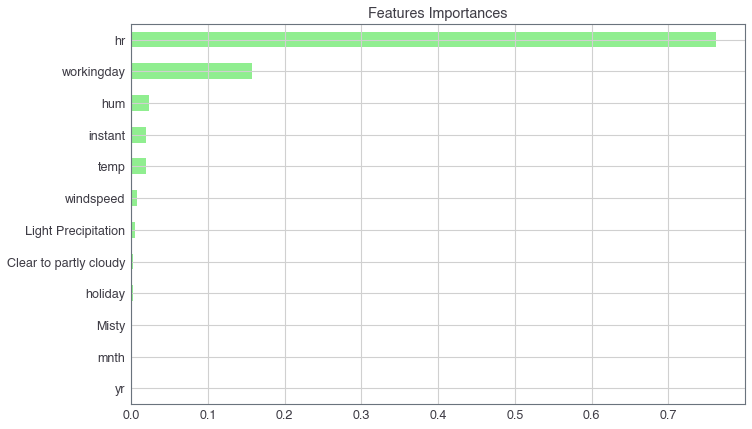

In [101]:
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

Apparently, `hr` and `workingday` are the most important features according to `rf`. The importances of these two features add up to more than 90%!

# Boosting

Boosting refers to an ensemble method in which several models are trained sequentially with each model learning from the errors of its predecessors. In this chapter, we'll introduce two boosting methods: AdaBoost and Gradient Boosting.

## Adaboost

**Boosting** refers to an ensemble method in which many predictors are trained and each predictor learns from the errors of its predecessor. More formally, in boosting many weak learners are combined to form a strong learner. A **weak learner** is a model doing slightly better than random guessing. For example, a decision tree with a maximum-depth of one, known as decision-stump, is a weak learner.

In boosting, an ensemble of predictors are trained sequentially and each predictor tries to correct the errors made by its predecessor. The two boosting methods we'll explore in this course are `AdaBoost` and `GradientBoosting`.

AdaBoost stands for **Ada**ptive **Boost**ing. In AdaBoost, each predictor pays more attention to the instances wrongly predicted by its predecessor by constantly changing the weights of training instances. Further more, each predictor is assigned a coefficient $\alpha$ that weighs its contribution in the ensemble's final prediction ($\alpha$ depends on the predictor's training error).

As shown in the diagram, there are N predictors in total:

![AdaBoost Training](assets/adaboost.png)

First, $predictor_1$ is trained on the initial dataset (X,y), and the training error for $predictor_1$ is determined. This error can be then be used to determine the $\alpha_1$ which is $predictor_1$'s coefficient. $\alpha_1$ is then used to determine the weights $W^{(2)}$ of the training instances for $predictor_2$. Notice how the incorrectly predicted instances shown in green acquire higher weights. When the weighted instances are used to train $predictor_2$, this predictor is forced to pay more attention to the incorrectly predicted instances. This process is repeated sequentially, until the $N$ predictors forming the ensemble are trained.

An important parameter used in training is the learning rate: $0 < \eta < 1$; it is used to shrink the coefficient $\alpha$ of a trained predictor. It's important to note that there's a trade-off between $\eta$ and the number of estimators. A smaller value of $\eta$ should be compensated by a greater number of estimators.

Once all the predictors in the ensemble are trained, the label of a new instance can be predicted depending on the nature of the problem. 

* For `classification`, each predictor predicts the label of the new instance and the ensemble's prediction is obtained by weighted majority voting. The scikit-learn class is `AdaBoostClassifier`.
* For `regression`, the same procedure is applied and the ensemble's prediction is obtained by performing a weighted average. The scikit-learn class is `AdaBoostRegressor`.

It's important to note that individual predictors need to be CARTs. However CARTs are used most of the time in boosting because of their high variance.

### Define the AdaBoost classifier

In the following examples we'll revisit the [Indian Liver Patient](https://www.kaggle.com/uciml/indian-liver-patient-records) dataset which was introduced in a previous chapter. Our task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. However, this time, we'll be training an AdaBoost ensemble to perform the classification task. In addition, given that this dataset is imbalanced, we'll be using the ROC AUC score as a metric instead of accuracy.

As a first step, we'll start by instantiating an AdaBoost classifier.

In [107]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [108]:
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=utils.SEED)

In [109]:
# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=utils.SEED)

### Train the AdaBoost classifier

Now that we've instantiated the AdaBoost classifier `ada`, it's time train it. We will also predict the probabilities of obtaining the positive class in the test set.

Once the classifier `ada` is trained, call the `.predict_proba()` method by passing `X_test` as a parameter and extract these probabilities by slicing all the values in the second column.

In [110]:
X = utils.liver_disease.drop('Liver_disease', axis=1)
y = utils.liver_disease['Liver_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = utils.SEED)

In [111]:
# Fit ada to the training set
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=1,
                                

In [112]:
# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

### Evaluate the AdaBoost classifier

Now that we're done training `ada` and predicting the probabilities of obtaining the positive class in the test set, it's time to evaluate `ada`'s ROC AUC score. Recall that the ROC AUC score of a binary classifier can be determined using the `roc_auc_score()` function from `sklearn.metrics`.

In [113]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

In [114]:
# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

In [115]:
# Print roc_auc_score
print(f'ROC AUC score: {ada_roc_auc:.2f}')

ROC AUC score: 0.64


Not bad! This untuned AdaBoost classifier achieved a ROC AUC score of 0.64!

## Gradient Boosting (GB)

Gradient Boosting is a popular boosting algorithm that has a proven track record of winning many machine learning competitions. In gradient boosting, each predictor in the ensemble corrects its predecessor's error. In contrast to AdaBoost, the weights of the training instances are not tweaked. Instead, each predictor is trained using the residual errors of its predecessor as labels. In the following sections, we'll explore the technique  known as gradient boosted trees where the base learner is a CART.

To understand how gradient boosted trees are trained for a regression problem, take a look at the diagram here:

![Gradient Boosting](assets/boosted_trees.png)

The ensemble consists on $N$ trees. $Tree_1$ is trained using the features matrix $X$ and the dataset labels $y$. The predictions labeled $\hat{y}_1$ are used to determine the training set residual errors $r_1$. $Tree_2$ is then trained using the features matrix $X$ and the residual errors $r_1$ of $Tree_1$ as labels. The predicted residuals $\hat{r}_1$ are then used to determine the residuals of residuals which are labeled $r_2$. This process is repeated until all of the $N$ trees forming the ensemble are trained.

An important parameter used in training gradient boosted trees is `shrinkage`. In this context, shrinkage refers to the fact that the prediction of each tree in the ensemble is shrinked after it is multiplied by a learning rate $\eta$ which is a number between 0 and 1.

Similar to AdaBoost, there's a trade-off between $\eta$ and the number of estimators. Decreasing the learning rate needs to be compensated by increasing the number of estimators in order for the ensemble to reach a certain performance.

Once all trees in the ensemble are trained, prediction can be made. When a new instance is available, each tree predicts a label and the final ensemble prediction is given by the formula shown below:

$$ y_{pred} = y_1 + \eta r_1 + ... + \eta r_N $$

In scikit-learn, the class for a gradient boosting regressor is `GradientBoostingRegressor`. Though not discussed in this course, a similar algorithm is used for classification problems. The class implementing gradient-boosting-classification in scikit-learn is `GradientBoostingClassifier`.

### Define the GB regressor

We'll now revisit the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset that was introduced in the previous chapter. Recall that our task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, we'll be using a gradient boosting regressor.

As a first step, we'll start by instantiating a gradient boosting regressor which we will train in the next example.

In [116]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [117]:
# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=utils.SEED)

### Train the GB regressor

We'll now train the gradient boosting regressor `gb` that we instantiated in the previous example and predict test set labels.

In [118]:
X = bikes.drop('cnt', axis=1)
y = bikes['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = utils.SEED)

In [119]:
# Fit gb to the training set
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [120]:
# Predict test set labels
y_pred = gb.predict(X_test)

### Evaluate the GB regressor

Now that the test set predictions are available, we can use them to evaluate the test set Root Mean Squared Error (RMSE) of `gb`.

In [ ]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

In [122]:
# Compute MSE
mse_test = MSE(y_test, y_pred)

In [123]:
# Compute RMSE
rmse_test = mse_test ** 0.5

In [124]:
# Print RMSE
print(f'Test set RMSE of gb: {rmse_test:.3f}')

Test set RMSE of gb: 43.140


## Stochastic Gradient Boosting (SGB)

Gradient boosting involves an exhaustive search procedure. Each tree in the ensemble is trained to find the best split-points and the best features. This procedure may lead to CARTs that use the same split-points and possibly the same features. To mitigate these effects, we can use an algorithm known as stochastic gradient boosting.

In stochastic gradient boosting, each CART is trained on a random subset of the training data. This subset is sampled without replacement. Further more, at the level of each node, features are sampled without replacement when choosing the best split-points. As a result, this creates further diversity in the ensemble and the net effect is adding more variance to the ensemble of trees.

**Stochasting Gradient Boosting: Training**

Let's take a closer look at the training procedure used in stochastic gradient boosting by examining the diagram shown below:

![SGB Training](assets/sgb_training.png)

First, instead of providing all the training instances to a tree, only a fraction of these instances are provided through sampling without relacement. The sample data is then used for training a tree. However, not all features are considered when a split is made. Instead, only a certain randomly sampled fraction of these features are used for this purpose.

Once a tree is trained, predictions are made and the residual errors can be computed. These residual errors are multiplied by the learning rate $\eta$ ad are fed to the next tree in the ensemble. This procedure is repeated seqentially until all the trees in the ensemble are trained.

The prediction procedure for a new instance in stochastic gradient boosting is similar to that of gradient boosting.


### Regression with SGB

As in the examples from the previous lesson, you'll be working with the Bike Sharing Demand dataset. In the following set of examples, we'll solve this bike count regression problem using stochastic gradient boosting.

In [125]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [126]:
# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
                                 subsample=0.9,
                                 max_features=0.75,
                                 n_estimators=200,                                
                                 random_state=utils.SEED)

### Train the SGB regressor

In this example, we'll train the SGBR `sgbr` instantiated above and predict the test set labels.

In [127]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=0.75, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=0.9, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [128]:
# Predict test set labels
y_pred = sgbr.predict(X_test)

### Evaluate the SGB regressor

We have prepared the ground to determine the test set RMSE of `sgbr` which you shall evaluate in this example.

In [129]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test ** 0.5

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 42.183


The stochastic gradient boosting regressor achieves a lower test set RMSE than the gradient boosting regressor (which was 43.140)!